In [1]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,10)})

In [3]:
dataset = pd.read_csv("vehicles.csv")
dataset = dataset.dropna()

## What are the different vehicle types?

In [4]:
pd.unique(dataset['Vehicle_Type']).tolist()

[
    'passenger cars',
    'light lorries',
    'heavy lorries',
    'towing vehicles',
    'buses',
    'motorcycles',
    'mopeds class 1',
    'tractors',
    'snowmobiles',
    'all-terrain vehicles',
    'cross-country scooters',
    'trailers'
]

## What are the locations contained within the dataset?

In [5]:
pd.unique(dataset['Region']).tolist()

[
    'Stockholms län',
    'Uppsala län',
    'Södermanlands län',
    'Östergötlands län',
    'Jönköpings län',
    'Kronobergs län',
    'Kalmar län',
    'Gotlands län',
    'Blekinge län',
    'Skåne län',
    'Hallands län',
    'Västra Götalands län',
    'former Älvsborg county',
    'former Skaraborg county',
    'Värmlands län',
    'Örebro län',
    'Västmanlands län',
    'Dalarnas län',
    'Gävleborgs län',
    'Västernorrlands län',
    'Jämtlands län',
    'Västerbottens län',
    'Norrbottens län'
]

## What is the distrubution of number of vehicles base on the vehicle type over the 21 years of records?

In [6]:
dataset[dataset["Region"] == 'Jönköpings län'].groupby("Vehicle_Type")["Number_of_Vehicles"].describe()

,count,mean,std,min,25%,50%,75%,max
Vehicle_Type,,,,,,,,
all-terrain vehicles,21.0,2393.857143,1851.238728,0.0,0.0,2924.0,4044.0,4538.0
buses,21.0,531.380952,75.405223,380.0,476.0,525.0,600.0,635.0
cross-country scooters,21.0,601.952381,874.741589,16.0,22.0,24.0,1338.0,2397.0
heavy lorries,21.0,3375.047619,186.000666,3001.0,3303.0,3408.0,3484.0,3654.0
light lorries,21.0,17736.714286,3460.419037,12280.0,15330.0,17554.0,20547.0,22911.0
mopeds class 1,21.0,3013.142857,979.226495,684.0,2765.0,3104.0,3770.0,4247.0
motorcycles,21.0,11611.952381,1497.449781,8019.0,11283.0,12073.0,12522.0,13353.0
passenger cars,21.0,173299.238095,13566.970922,154012.0,163519.0,170152.0,187851.0,193384.0
snowmobiles,21.0,290.238095,215.962706,0.0,0.0,402.0,433.0,574.0


## What us the linear regression plot for the number of vehicles by year in Jonkoping?

<seaborn.axisgrid.FacetGrid object at 0x000002AFB492A160>

<Figure size 709.125x500 with 1 Axes>

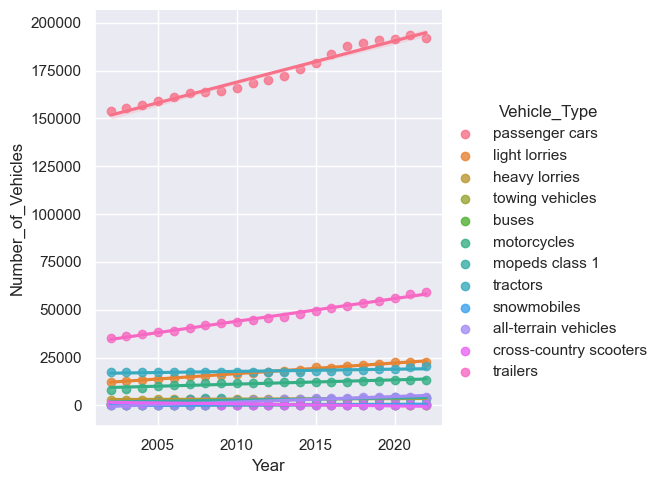

In [7]:
sns.lmplot(data=dataset[dataset["Region"] == "Jönköpings län"], x="Year", y="Number_of_Vehicles", hue="Vehicle_Type")

## What is the breakdown for the number of vehicles by region for each of the years?

<Figure size 1209.12x6000 with 23 Axes>

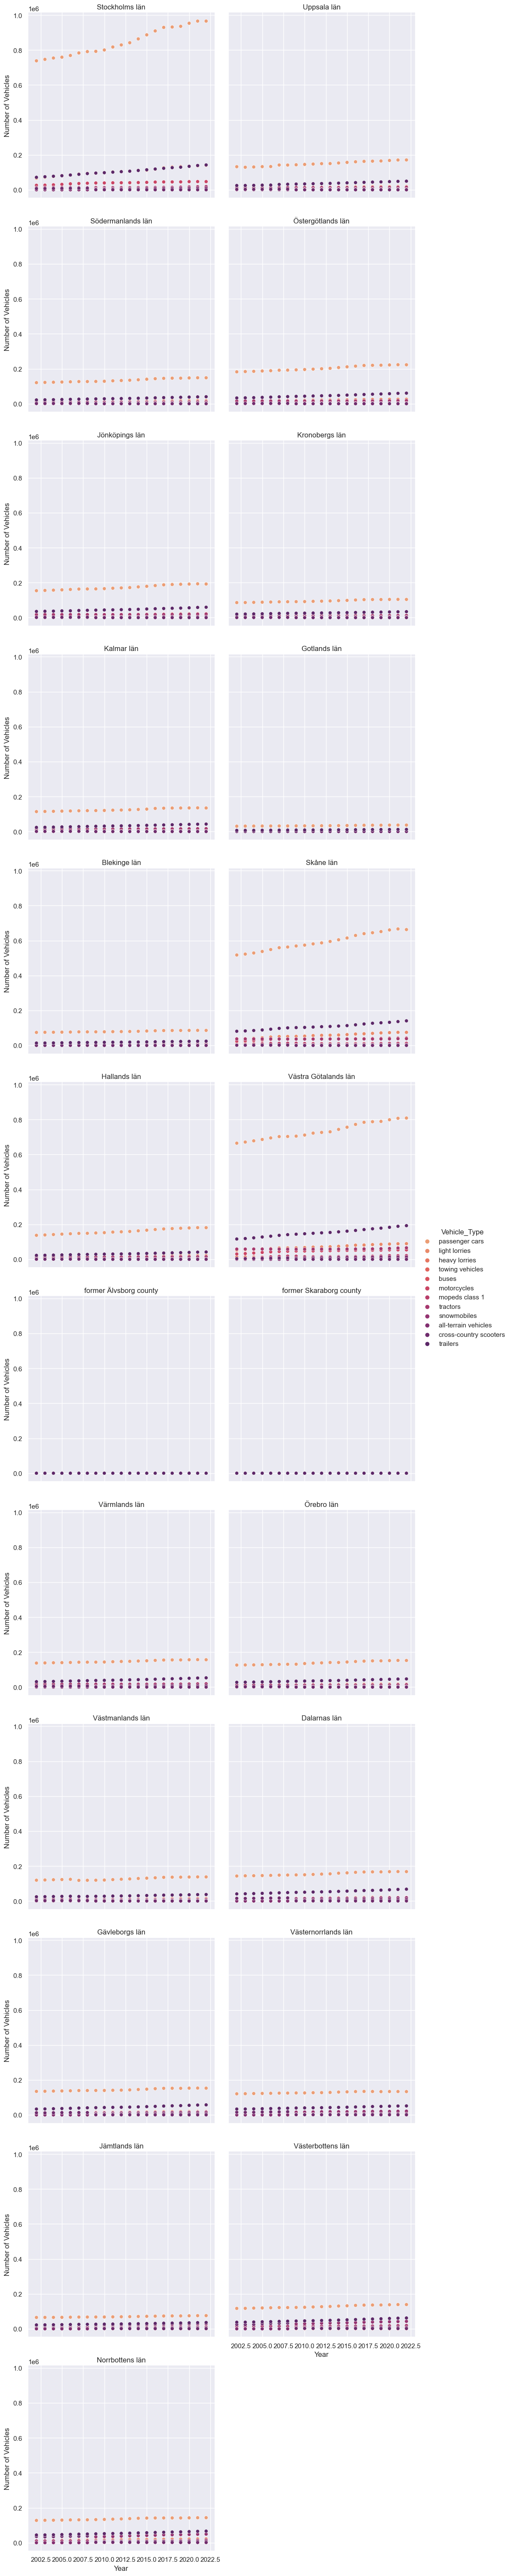

In [8]:
facet = sns.relplot(
    data=dataset,
    x="Year",
    y="Number_of_Vehicles",
    hue="Vehicle_Type",
    col="Region",
    col_wrap=2,
    palette="flare",
    legend="full",
    height=5,
)
facet.set_axis_labels("Year", "Number of Vehicles")
facet.set_titles(col_template="{col_name}");

## Can we predict the number of vehicles given a year, region, and type?

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

ohe = OneHotEncoder(sparse=False)
dataset = dataset[['Region', 'Year', 'Vehicle_Type', 'Number_of_Vehicles']]
dataset = dataset.sample(frac=1)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
ohe.fit(X[['Region', 'Year', 'Vehicle_Type']])
new_X = ohe.transform(X[['Region', 'Year', 'Vehicle_Type']])

In [10]:
X_train, X_test, y_train, y_test = train_test_split( new_X, y, test_size=0.20, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Absoluter Error: ", mean_absolute_error(y_test, y_pred=y_pred))

Mean Absoluter Error:  23770.97327586207


In [12]:
model = LinearRegression()
scores = cross_val_score(model, new_X, y, cv=10, scoring="neg_mean_absolute_error")
scores

array([-21939.30172414, -25168.45862069, -24022.70862069, -21368.63103448,
       -22581.40517241, -23575.75172414, -21108.2746114 , -21424.56476684,
       -20500.74093264, -22085.44732297])

## Can PCA improve the performance on the previous model that used one hot encoding?

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
X_pca = pca.fit_transform(new_X)
X_train, X_test, y_train, y_test = train_test_split( X_pca, y, test_size=0.20, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Absoluter Error: ", mean_absolute_error(y_test, y_pred=y_pred))

Mean Absoluter Error:  21123.42537326269


In [14]:
model = LinearRegression()
scores = cross_val_score(model, X_pca, y, cv=10, scoring="neg_mean_absolute_error")
scores

array([-17371.326454  , -23194.72212014, -21479.90668093, -17667.57025105,
       -17976.6568009 , -20481.84669704, -18141.20664917, -19813.9349338 ,
       -17987.82988074, -20613.03208192])